In this notebook I only perform data importing  , merging different dataframe , fetching null value and dealing with outlier.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
diet = pd.read_csv("diet.csv")

In [4]:
exam = pd.read_csv("examination.csv")

In [5]:
labs = pd.read_csv("labs.csv")

In [6]:
diet.head(2)

SEQN        WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  73557  16888.327864  12930.890649         1      49.0    2.0     2.0   
1  73558  17932.143865  12684.148869         1      59.0    2.0     2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0      6.0     2.0      1.0  ...       NaN      NaN       NaN      NaN   
1      4.0     1.0      1.0  ...       NaN      2.0       NaN      2.0   

   DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0       NaN      NaN       NaN      NaN       NaN      NaN  
1       NaN      2.0       NaN      2.0       NaN      2.0  

[2 rows x 168 columns]

In [7]:
diet.shape

(9813, 168)

In [9]:
diet.dtypes

SEQN          int64
WTDRD1      float64
WTDR2D      float64
DR1DRSTZ      int64
DR1EXMER    float64
             ...   
DRD370T     float64
DRD370TQ    float64
DRD370U     float64
DRD370UQ    float64
DRD370V     float64
Length: 168, dtype: object

In [10]:
diet.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

Its all entities are dtype Int and float

In [11]:
exam.head(2)

SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  \
0  73557         1     620.0       NaN     NaN     1.0     4.0    86.0   
1  73558         1     766.0       NaN     NaN     1.0     4.0    74.0   

   BPXPULS  BPXPTY  ...  CSXLEAOD  CSXSOAOD  CSXGRAOD  CSXONOD  CSXNGSOD  \
0      1.0     1.0  ...       2.0       1.0       1.0      1.0       4.0   
1      1.0     1.0  ...       3.0       1.0       2.0      3.0       4.0   

   CSXSLTRT  CSXSLTRG  CSXNART  CSXNARG  CSAEFFRT  
0      62.0       1.0      NaN      NaN       1.0  
1      28.0       1.0      NaN      NaN       1.0  

[2 rows x 224 columns]

In [12]:
exam.dtypes

SEQN          int64
PEASCST1      int64
PEASCTM1    float64
PEASCCT1    float64
BPXCHR      float64
             ...   
CSXSLTRT    float64
CSXSLTRG    float64
CSXNART     float64
CSXNARG     float64
CSAEFFRT    float64
Length: 224, dtype: object

In [14]:
exam.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [15]:
obj_exam= exam.select_dtypes(include=['object'])

In [17]:
obj_exam.head(2)

OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
0        P        P        P        P        P        P        P        P   
1        Z        J        S        S        S        S        S        S   

  OHX10CTC OHX11CTC  ... OHX23CTC OHX24CTC OHX25CTC OHX26CTC OHX27CTC  \
0        P        P  ...        P        P        P        P        P   
1        S        S  ...        S        S        S        S        S   

  OHX28CTC OHX29CTC OHX30CTC OHX31CTC CSXTSEQ  
0        P        P        P        P       B  
1        Z        S        E        E       A  

[2 rows x 29 columns]

In [19]:
obj_exam.shape

(9813, 29)

In [12]:
obj_exam.isnull().sum()

OHX02CTC     848
OHX03CTC     848
OHX04CTC     848
OHX05CTC     848
OHX06CTC     848
OHX07CTC     848
OHX08CTC     848
OHX09CTC     848
OHX10CTC     848
OHX11CTC     848
OHX12CTC     848
OHX13CTC     848
OHX14CTC     848
OHX15CTC     848
OHX18CTC     848
OHX19CTC     848
OHX20CTC     848
OHX21CTC     848
OHX22CTC     848
OHX23CTC     848
OHX24CTC     848
OHX25CTC     848
OHX26CTC     848
OHX27CTC     848
OHX28CTC     848
OHX29CTC     848
OHX30CTC     848
OHX31CTC     848
CSXTSEQ     6579
dtype: int64

In [20]:
exam.drop(['CSXTSEQ'],inplace = True, axis= 1)

Its all entities are not dtype Int and float it will handle further

In [21]:
labs.head(2)

SEQN  URXUMA  URXUMS  URXUCR.x  URXCRS  URDACT  WTSAF2YR.x  LBXAPB  \
0  73557     4.3     4.3      39.0  3447.6   11.03         NaN     NaN   
1  73558   153.0   153.0      50.0  4420.0  306.00         NaN     NaN   

   LBDAPBSI  LBXSAL  ...  URXUTL  URDUTLLC  URXUTU  URDUTULC  URXUUR  \
0       NaN     4.1  ...     NaN       NaN     NaN       NaN     NaN   
1       NaN     4.7  ...     NaN       NaN     NaN       NaN     NaN   

   URDUURLC  URXPREG  URXUAS  LBDB12  LBDB12SI  
0       NaN      NaN     NaN   524.0     386.7  
1       NaN      NaN     NaN   507.0     374.2  

[2 rows x 424 columns]

In [22]:
labs.dtypes

SEQN          int64
URXUMA      float64
URXUMS      float64
URXUCR.x    float64
URXCRS      float64
             ...   
URDUURLC    float64
URXPREG     float64
URXUAS      float64
LBDB12      float64
LBDB12SI    float64
Length: 424, dtype: object

In [23]:
labs.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

its all entities are int and float

In [24]:
diet_c = diet.columns
diet_c

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=168)

In [25]:
exam_c = exam.columns
exam_c

Index(['SEQN', 'PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPAARM',
       'BPACSZ', 'BPXPLS', 'BPXPULS', 'BPXPTY',
       ...
       'CSXLEAOD', 'CSXSOAOD', 'CSXGRAOD', 'CSXONOD', 'CSXNGSOD', 'CSXSLTRT',
       'CSXSLTRG', 'CSXNART', 'CSXNARG', 'CSAEFFRT'],
      dtype='object', length=223)

In [26]:
labs_c = labs.columns
labs_c

Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
       'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
       ...
       'URXUTL', 'URDUTLLC', 'URXUTU', 'URDUTULC', 'URXUUR', 'URDUURLC',
       'URXPREG', 'URXUAS', 'LBDB12', 'LBDB12SI'],
      dtype='object', length=424)

I find that the column 'SEQN' is common in all the three Dataframe

Now i check is 'SEQN' is primary key for all the Data frame

In [28]:
exam['SEQN'].duplicated().sum()

0

In [29]:
labs['SEQN'].duplicated().sum()

0

In [30]:
diet['SEQN'].duplicated().sum()

0

IN each dataframe 'SEQN' is primary key

# NOW merge all the three DataFrame

In [31]:
data = exam.merge(labs , on = 'SEQN',how='inner')

In [32]:
data.shape

(9813, 646)

In [33]:
data = data.merge(diet , on = 'SEQN',how = 'inner' )

In [34]:
data.shape

(9813, 813)

In [35]:
data.head(2)

SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  \
0  73557         1     620.0       NaN     NaN     1.0     4.0    86.0   
1  73558         1     766.0       NaN     NaN     1.0     4.0    74.0   

   BPXPULS  BPXPTY  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  DRD370SQ  \
0      1.0     1.0  ...       NaN      NaN       NaN      NaN       NaN   
1      1.0     1.0  ...       NaN      2.0       NaN      2.0       NaN   

   DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0      NaN       NaN      NaN       NaN      NaN  
1      2.0       NaN      2.0       NaN      2.0  

[2 rows x 813 columns]

Null count in each column

In [36]:
null_data = data.isnull().sum()
null_data

SEQN           0
PEASCST1       0
PEASCTM1     305
PEASCCT1    9493
BPXCHR      7852
            ... 
DRD370T     4692
DRD370TQ    8495
DRD370U     4692
DRD370UQ    9496
DRD370V     4693
Length: 813, dtype: int64

In [37]:
cutoff = (3*data.shape[0])/4
cutoff

7359.75

In [39]:
null_data[[0]]

SEQN    0
dtype: int64

In [40]:
count_null_g_t_75 = 0

In [41]:
for i in null_data:
    if i>cutoff:
        count_null_g_t_75 +=1
    

In [42]:
count_null_g_t_75

225

It means these 375 column not have even 50 % Data or in otherword in 375 column more than 50% rows are NULL 

Now Proceed for Rows And check is there rows whose more than 50% column are empty

In [43]:
y = []

In [44]:
for i in range(len(data.index)) :
    y.append(data.iloc[i].isnull().sum())
    
#     =data.iloc[i].isnull().sum()



In [45]:
len(y)

9813

In [46]:
p = 0
for i in y :
    if i>407:
        p+=1


In [48]:
p

4888

These 4910 rows have more than 50% column are NULL

# NOw proceed to drop colummn first

In [49]:
data1 = data.copy()


In [50]:
null_data[[0]]

SEQN    0
dtype: int64

In [52]:
for i in data1:
    if null_data[i]>cutoff:
        data1.drop([i] , axis = 1 , inplace = True)

In [53]:
data1.shape

(9813, 588)

In [54]:
data1

SEQN  PEASCST1  PEASCTM1  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  \
0     73557         1     620.0     1.0     4.0    86.0      1.0     1.0   
1     73558         1     766.0     1.0     4.0    74.0      1.0     1.0   
2     73559         1     665.0     1.0     4.0    68.0      1.0     1.0   
3     73560         1     803.0     1.0     2.0    64.0      1.0     1.0   
4     73561         1     949.0     1.0     3.0    92.0      1.0     1.0   
...     ...       ...       ...     ...     ...     ...      ...     ...   
9808  83727         1     611.0     1.0     3.0    60.0      1.0     1.0   
9809  83728         1     124.0     NaN     NaN     NaN      1.0     NaN   
9810  83729         1     679.0     1.0     4.0    80.0      1.0     1.0   
9811  83730         1     381.0     NaN     NaN     NaN      1.0     NaN   
9812  83731         1     498.0     1.0     3.0    90.0      1.0     1.0   

      BPXML1  BPXSY1  ...  DRD370M  DRD370N  DRD370O  DRD370P  DRD370Q  \
0      140.0   122.0  ...      NaN      NaN      NaN      NaN      NaN   
1      170.0   156.0  ...      2.0      2.0      2.0      2.0      2.0   
2      160.0   140.0  ...      NaN      NaN      NaN      NaN      NaN   
3      130.0   108.0  ...      NaN      NaN      NaN      NaN      NaN   
4      170.0   136.0  ...      2.0      2.0      2.0      2.0      2.0   
...      ...     ...  ...      ...      ...      ...      ...      ...   
9808   140.0   110.0  ...      2.0      2.0      2.0      2.0      2.0   
9809     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
9810   150.0   136.0  ...      1.0      2.0      2.0      2.0      2.0   
9811     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
9812   120.0    94.0  ...      NaN      NaN      NaN      NaN      NaN   

      DRD370R  DRD370S  DRD370T  DRD370U  DRD370V  
0         NaN      NaN      NaN      NaN      NaN  
1         2.0      2.0      2.0      2.0      2.0  
2         NaN      NaN      NaN      NaN      NaN  
3         NaN      NaN      NaN      NaN      NaN  
4         2.0      2.0      2.0      2.0      2.0  
...       ...      ...      ...      ...      ...  
9808      2.0      2.0      2.0      2.0      2.0  
9809      NaN      NaN      NaN      NaN      NaN  
9810      2.0      2.0      2.0      2.0      2.0  
9811      NaN      NaN      NaN      NaN      NaN  
9812      NaN      NaN      NaN      NaN      NaN  

[9813 rows x 588 columns]

Now recheck for ROWS 

In [56]:
data2  =data1.copy()
data2.shape

(9813, 588)

# Now proceed for droping rows

In [61]:
y1= []
for i in range(len(data1.index)) :
    y1.append(data2.iloc[i].isnull().sum())
p = 0
for i in y1 :
    if i>295:
        p+=1
p



2522

In [62]:
len(y1)

9813

In [63]:
data2.shape

(9813, 588)

In [64]:
range_ = data2.shape[0] -1
range_

9812

In [65]:
data2["NULL"] = y1

In [66]:
data2

SEQN  PEASCST1  PEASCTM1  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  \
0     73557         1     620.0     1.0     4.0    86.0      1.0     1.0   
1     73558         1     766.0     1.0     4.0    74.0      1.0     1.0   
2     73559         1     665.0     1.0     4.0    68.0      1.0     1.0   
3     73560         1     803.0     1.0     2.0    64.0      1.0     1.0   
4     73561         1     949.0     1.0     3.0    92.0      1.0     1.0   
...     ...       ...       ...     ...     ...     ...      ...     ...   
9808  83727         1     611.0     1.0     3.0    60.0      1.0     1.0   
9809  83728         1     124.0     NaN     NaN     NaN      1.0     NaN   
9810  83729         1     679.0     1.0     4.0    80.0      1.0     1.0   
9811  83730         1     381.0     NaN     NaN     NaN      1.0     NaN   
9812  83731         1     498.0     1.0     3.0    90.0      1.0     1.0   

      BPXML1  BPXSY1  ...  DRD370N  DRD370O  DRD370P  DRD370Q  DRD370R  \
0      140.0   122.0  ...      NaN      NaN      NaN      NaN      NaN   
1      170.0   156.0  ...      2.0      2.0      2.0      2.0      2.0   
2      160.0   140.0  ...      NaN      NaN      NaN      NaN      NaN   
3      130.0   108.0  ...      NaN      NaN      NaN      NaN      NaN   
4      170.0   136.0  ...      2.0      2.0      2.0      2.0      2.0   
...      ...     ...  ...      ...      ...      ...      ...      ...   
9808   140.0   110.0  ...      2.0      2.0      2.0      2.0      2.0   
9809     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
9810   150.0   136.0  ...      2.0      2.0      2.0      2.0      2.0   
9811     NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
9812   120.0    94.0  ...      NaN      NaN      NaN      NaN      NaN   

      DRD370S  DRD370T  DRD370U  DRD370V  NULL  
0         NaN      NaN      NaN      NaN   231  
1         2.0      2.0      2.0      2.0   170  
2         NaN      NaN      NaN      NaN   216  
3         NaN      NaN      NaN      NaN   225  
4         2.0      2.0      2.0      2.0   229  
...       ...      ...      ...      ...   ...  
9808      2.0      2.0      2.0      2.0   214  
9809      NaN      NaN      NaN      NaN   359  
9810      2.0      2.0      2.0      2.0    95  
9811      NaN      NaN      NaN      NaN   403  
9812      NaN      NaN      NaN      NaN   285  

[9813 rows x 589 columns]

In [68]:
data2[data2['NULL']<=295]

SEQN  PEASCST1  PEASCTM1  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  \
0     73557         1     620.0     1.0     4.0    86.0      1.0     1.0   
1     73558         1     766.0     1.0     4.0    74.0      1.0     1.0   
2     73559         1     665.0     1.0     4.0    68.0      1.0     1.0   
3     73560         1     803.0     1.0     2.0    64.0      1.0     1.0   
4     73561         1     949.0     1.0     3.0    92.0      1.0     1.0   
...     ...       ...       ...     ...     ...     ...      ...     ...   
9804  83723         1     845.0     1.0     4.0    74.0      1.0     1.0   
9805  83724         1    1419.0     1.0     4.0    54.0      1.0     1.0   
9808  83727         1     611.0     1.0     3.0    60.0      1.0     1.0   
9810  83729         1     679.0     1.0     4.0    80.0      1.0     1.0   
9812  83731         1     498.0     1.0     3.0    90.0      1.0     1.0   

      BPXML1  BPXSY1  ...  DRD370N  DRD370O  DRD370P  DRD370Q  DRD370R  \
0      140.0   122.0  ...      NaN      NaN      NaN      NaN      NaN   
1      170.0   156.0  ...      2.0      2.0      2.0      2.0      2.0   
2      160.0   140.0  ...      NaN      NaN      NaN      NaN      NaN   
3      130.0   108.0  ...      NaN      NaN      NaN      NaN      NaN   
4      170.0   136.0  ...      2.0      2.0      2.0      2.0      2.0   
...      ...     ...  ...      ...      ...      ...      ...      ...   
9804   180.0     NaN  ...      NaN      NaN      NaN      NaN      NaN   
9805   200.0   164.0  ...      2.0      2.0      2.0      2.0      2.0   
9808   140.0   110.0  ...      2.0      2.0      2.0      2.0      2.0   
9810   150.0   136.0  ...      2.0      2.0      2.0      2.0      2.0   
9812   120.0    94.0  ...      NaN      NaN      NaN      NaN      NaN   

      DRD370S  DRD370T  DRD370U  DRD370V  NULL  
0         NaN      NaN      NaN      NaN   231  
1         2.0      2.0      2.0      2.0   170  
2         NaN      NaN      NaN      NaN   216  
3         NaN      NaN      NaN      NaN   225  
4         2.0      2.0      2.0      2.0   229  
...       ...      ...      ...      ...   ...  
9804      NaN      NaN      NaN      NaN   163  
9805      2.0      2.0      2.0      2.0   224  
9808      2.0      2.0      2.0      2.0   214  
9810      2.0      2.0      2.0      2.0    95  
9812      NaN      NaN      NaN      NaN   285  

[7291 rows x 589 columns]

In [69]:
data2.drop(['NULL'],axis = 1,inplace = True)

In [70]:
data2.shape

(9813, 588)

In [71]:
data2.isnull().sum()

SEQN           0
PEASCST1       0
PEASCTM1     305
BPAARM      2278
BPACSZ      2271
            ... 
DRD370R     4692
DRD370S     4692
DRD370T     4692
DRD370U     4692
DRD370V     4693
Length: 588, dtype: int64

In [72]:
dtype = data2.dtypes

In [73]:
dtype.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [74]:
data3 =data2.copy()

In [75]:
obj_data = data3.select_dtypes(include=['object'])

In [76]:
obj_data.head(2)

OHX02CTC OHX03CTC OHX04CTC OHX05CTC OHX06CTC OHX07CTC OHX08CTC OHX09CTC  \
0        P        P        P        P        P        P        P        P   
1        Z        J        S        S        S        S        S        S   

  OHX10CTC OHX11CTC  ... OHX22CTC OHX23CTC OHX24CTC OHX25CTC OHX26CTC  \
0        P        P  ...        P        P        P        P        P   
1        S        S  ...        S        S        S        S        S   

  OHX27CTC OHX28CTC OHX29CTC OHX30CTC OHX31CTC  
0        P        P        P        P        P  
1        S        Z        S        E        E  

[2 rows x 28 columns]

In [77]:
obj_col = obj_data.columns
obj_col

Index(['OHX02CTC', 'OHX03CTC', 'OHX04CTC', 'OHX05CTC', 'OHX06CTC', 'OHX07CTC',
       'OHX08CTC', 'OHX09CTC', 'OHX10CTC', 'OHX11CTC', 'OHX12CTC', 'OHX13CTC',
       'OHX14CTC', 'OHX15CTC', 'OHX18CTC', 'OHX19CTC', 'OHX20CTC', 'OHX21CTC',
       'OHX22CTC', 'OHX23CTC', 'OHX24CTC', 'OHX25CTC', 'OHX26CTC', 'OHX27CTC',
       'OHX28CTC', 'OHX29CTC', 'OHX30CTC', 'OHX31CTC'],
      dtype='object')

In [78]:
for i in data3:
    if i not in obj_col:
        means = data3[i].mean()
        data3[i].fillna(means,inplace = True)

In [79]:
obj_data.isnull().sum()

OHX02CTC    848
OHX03CTC    848
OHX04CTC    848
OHX05CTC    848
OHX06CTC    848
OHX07CTC    848
OHX08CTC    848
OHX09CTC    848
OHX10CTC    848
OHX11CTC    848
OHX12CTC    848
OHX13CTC    848
OHX14CTC    848
OHX15CTC    848
OHX18CTC    848
OHX19CTC    848
OHX20CTC    848
OHX21CTC    848
OHX22CTC    848
OHX23CTC    848
OHX24CTC    848
OHX25CTC    848
OHX26CTC    848
OHX27CTC    848
OHX28CTC    848
OHX29CTC    848
OHX30CTC    848
OHX31CTC    848
dtype: int64

In [85]:
obj_data.shape

(9813, 28)

In [86]:
obj_data.dropna().shape

(8965, 28)

In [87]:
8965+848

9813

In [88]:
data3.dropna(inplace = True)

In [89]:
data3.isnull().sum().sum()

0

In [91]:
data4= data3.copy()

In [92]:
data4.shape

(8965, 588)

In [93]:
for i in obj_col:
    dummies = pd.get_dummies(data4[i],prefix = i,drop_first = True)
    data4 = pd.concat([data4,dummies],axis = 1)
    data4.drop([i] , axis = 1 , inplace = True)
    



In [94]:
data4

SEQN  PEASCST1  PEASCTM1    BPAARM    BPACSZ     BPXPLS  BPXPULS  \
0     73557         1     620.0  1.000000  4.000000  86.000000      1.0   
1     73558         1     766.0  1.000000  4.000000  74.000000      1.0   
2     73559         1     665.0  1.000000  4.000000  68.000000      1.0   
3     73560         1     803.0  1.000000  2.000000  64.000000      1.0   
4     73561         1     949.0  1.000000  3.000000  92.000000      1.0   
...     ...       ...       ...       ...       ...        ...      ...   
9808  83727         1     611.0  1.000000  3.000000  60.000000      1.0   
9809  83728         1     124.0  1.008096  3.675418  74.416214      1.0   
9810  83729         1     679.0  1.000000  4.000000  80.000000      1.0   
9811  83730         1     381.0  1.008096  3.675418  74.416214      1.0   
9812  83731         1     498.0  1.000000  3.000000  90.000000      1.0   

        BPXPTY     BPXML1      BPXSY1  ...  OHX31CTC_J  OHX31CTC_M  \
0     1.000000  140.00000  122.000000  ...           0           0   
1     1.000000  170.00000  156.000000  ...           0           0   
2     1.000000  160.00000  140.000000  ...           0           0   
3     1.000000  130.00000  108.000000  ...           0           0   
4     1.000000  170.00000  136.000000  ...           0           0   
...        ...        ...         ...  ...         ...         ...   
9808  1.000000  140.00000  110.000000  ...           0           0   
9809  1.004363  144.67364  118.123536  ...           0           0   
9810  1.000000  150.00000  136.000000  ...           0           0   
9811  1.004363  144.67364  118.123536  ...           0           0   
9812  1.000000  120.00000   94.000000  ...           0           0   

      OHX31CTC_P  OHX31CTC_Q  OHX31CTC_R  OHX31CTC_S  OHX31CTC_T  OHX31CTC_U  \
0              1           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           1   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
9808           0           0           0           1           0           0   
9809           0           0           0           0           0           1   
9810           0           0           0           0           0           0   
9811           0           0           0           0           0           1   
9812           0           0           0           1           0           0   

      OHX31CTC_Y  OHX31CTC_Z  
0              0           0  
1              0           0  
2              0           0  
3              0           0  
4              0           0  
...          ...         ...  
9808           0           0  
9809           0           0  
9810           0           1  
9811           0           0  
9812           0           0  

[8965 rows x 881 columns]

In [95]:
data4.isnull().sum().sum()

0

In [96]:
data4.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

Finaly it is ready for applying ML or DL

In [97]:
from sklearn import preprocessing

In [75]:
data5 = data4.drop(['SEQN'] , axis = 1 )

In [76]:
x = data5.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data5 = pd.DataFrame(x_scaled)

In [77]:
data5.shape

(8965, 880)

In [78]:
data5

0         1         2         3         4    5         6         7    \
0     0.0  0.214261  0.000000  0.750000  0.328571  0.0  0.000000  0.050761   
1     0.0  0.265292  0.000000  0.750000  0.242857  0.0  0.000000  0.088832   
2     0.0  0.229990  0.000000  0.750000  0.200000  0.0  0.000000  0.076142   
3     0.0  0.278224  0.000000  0.250000  0.171429  0.0  0.000000  0.038071   
4     0.0  0.329256  0.000000  0.500000  0.371429  0.0  0.000000  0.088832   
...   ...       ...       ...       ...       ...  ...       ...       ...   
8960  0.0  0.211115  0.000000  0.500000  0.142857  0.0  0.000000  0.050761   
8961  0.0  0.040895  0.008096  0.668854  0.245830  0.0  0.004363  0.056692   
8962  0.0  0.234883  0.000000  0.750000  0.285714  0.0  0.000000  0.063452   
8963  0.0  0.130724  0.008096  0.668854  0.245830  0.0  0.004363  0.056692   
8964  0.0  0.171618  0.000000  0.500000  0.357143  0.0  0.000000  0.025381   

           8         9    ...  870  871  872  873  874  875  876  877  878  \
0     0.345679  0.590164  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.555556  0.508197  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.456790  0.737705  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.259259  0.311475  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.432099  0.704918  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8960  0.271605  0.557377  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8961  0.321750  0.539098  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8962  0.432099  0.672131  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8963  0.321750  0.539098  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8964  0.172840  0.557377  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

      879  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
8960  0.0  
8961  0.0  
8962  1.0  
8963  0.0  
8964  0.0  

[8965 rows x 880 columns]

# PCA

In [79]:
data5.head(2)

0         1    2     3         4    5    6         7         8         9    \
0  0.0  0.214261  0.0  0.75  0.328571  0.0  0.0  0.050761  0.345679  0.590164   
1  0.0  0.265292  0.0  0.75  0.242857  0.0  0.0  0.088832  0.555556  0.508197   

   ...  870  871  872  873  874  875  876  877  878  879  
0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 880 columns]

In [80]:
import seaborn as sns

<AxesSubplot:>

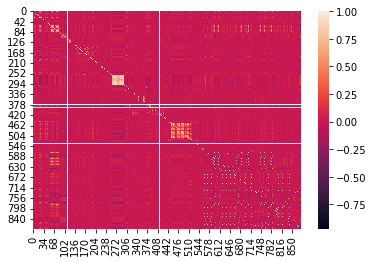

In [81]:
sns.heatmap(data5.corr())

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca2 = PCA(n_components = 2)

In [84]:
data6 = pca2.fit_transform(data5)
data6 = pd.DataFrame(data6)

In [85]:
data6.shape

(8965, 2)

<AxesSubplot:>

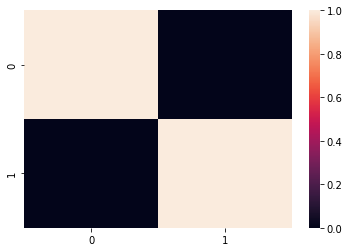

In [86]:
sns.heatmap(data6.corr())

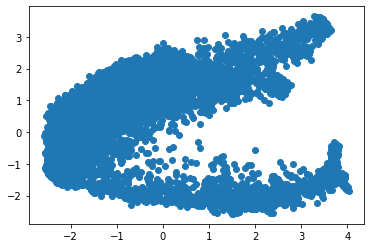

In [87]:
plt.scatter(x= data6[0] , y = data6[1])

In [88]:
pca3 = PCA(n_components = 3)


In [89]:
data7 = pca3.fit_transform(data5)
data7 = pd.DataFrame(data7)

In [90]:
data7.shape


(8965, 3)

<AxesSubplot:>

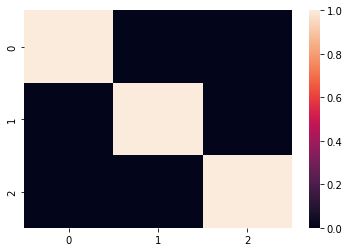

In [91]:
sns.heatmap(data7.corr())

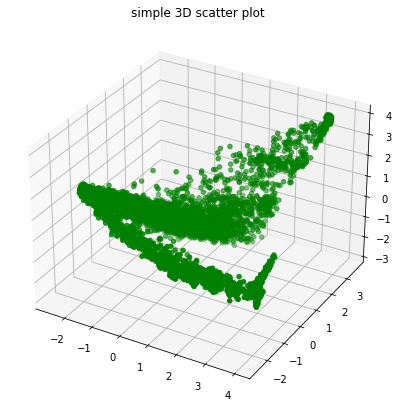

In [92]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data7[0], data7[1], data7[2], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [93]:
from sklearn.cluster import KMeans

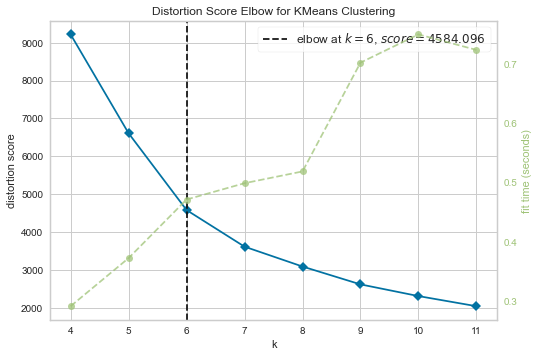

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(data6)     
visualizer.show()   

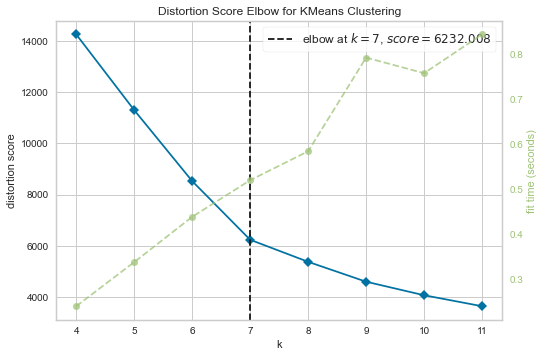

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(data7)     
visualizer.show()  

In [96]:
km = KMeans(7)
y_pre = km.fit_predict(data7)

In [97]:
y_pre

array([3, 2, 6, ..., 6, 1, 1])

In [98]:
y_pre.shape

(8965,)

In [99]:
data7['group_no'] = y_pre

In [100]:
from sklearn.cluster import KMeans
import numpy as np
# k means
# kmeans = KMeans(n_clusters=3, random_state=0)
# df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# # get centroids
# centroids = kmeans.cluster_centers_
# cen_x = [i[0] for i in centroids] 
# cen_y = [i[1] for i in centroids]
# ## add to df
# df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
# df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# # define and map colors
colors = ['#003f5c','#374c80','#7a5195','#bc5090','#ef5675','#ff764a','#ffa600']
data7['c'] = data7.group_no.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4],5:colors[5],6:colors[6]})

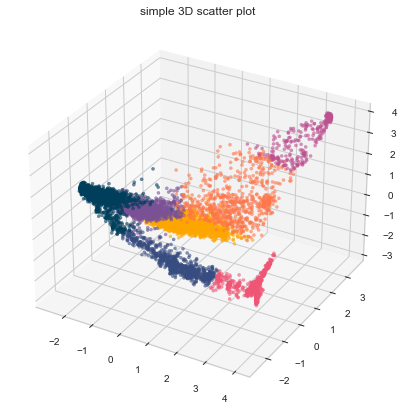

In [101]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data7[0], data7[1], data7[2],c=data7.c, alpha = 0.6, s=10)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

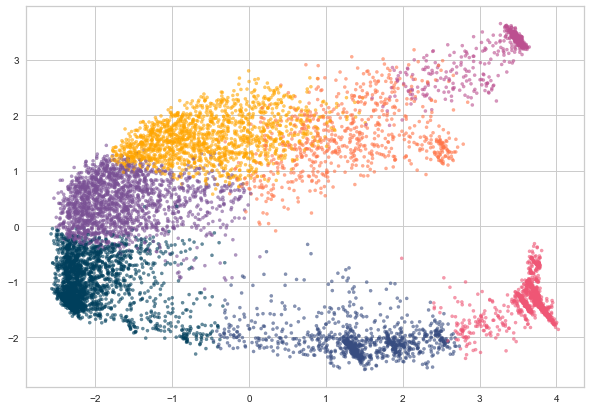

In [102]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(x= data6[0] , y = data6[1],c=data7.c, alpha = 0.6, s=10)
plt.show()

In [103]:
data4['group_no'] = y_pre

In [104]:
data_final = data4[['SEQN','group_no']]

In [105]:
data_final

SEQN  group_no
0     73557         3
1     73558         2
2     73559         6
3     73560         1
4     73561         5
...     ...       ...
9808  83727         0
9809  83728         4
9810  83729         6
9811  83730         1
9812  83731         1

[8965 rows x 2 columns]